# 贷还是不贷：如何用Python和机器学习帮你决策？ - 简书

 https://www.jianshu.com/p/67a71e366516

### Preworks in Command Line - install packages 


Before you start, you need to install two libraries. 

1. 'graphviz'

    $ sudo apt install graphviz
    

2. 'PIL' - python image library 

    $ pip install -U PIL

### 1. loading data.

In [1]:
import pandas as pd

# pandas is a library for manipulating dataFrame. DataFrame is table. 


In [2]:
# use .read_csv() function of pandas to read csv file. 

csv_data = pd.read_csv('loans.csv')

In [3]:
type(csv_data)
# after reading by pandas, the csv file is transformed into a dataframe object. 

pandas.core.frame.DataFrame

In [4]:
csv_data.head()


,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1


In [5]:
csv_data.shape


(46508, 13)

In [6]:
# .describe() show the describe information of the dataframe object (table). 
csv_data.describe()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
count,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000
mean,0.128645,6.343511,16.129507,0.586372,0.874989,55.964813,1.282769,0.004472
std,0.334810,3.750348,7.599843,0.492489,0.330735,25.526221,7.007558,1.000001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,3.000000,10.470000,0.000000,1.000000,37.700000,0.000000,-1.000000
50%,0.000000,6.000000,16.000000,1.000000,1.000000,58.400000,0.000000,1.000000
75%,0.000000,11.000000,21.600000,1.000000,1.000000,76.500000,0.000000,1.000000
max,1.000000,11.000000,38.130000,1.000000,1.000000,150.700000,208.820000,1.000000


In [7]:
# extract feature and target. 

# 'axis = 1'  是指第二个维度，即：列
x_data = csv_data.drop('safe_loans', axis=1)

y_data = csv_data.safe_loans

In [8]:
x_data.shape

(46508, 12)

In [9]:
y_data.shape

# 这里的逗号后面没有数字，指的是只有1列。

(46508,)

In [10]:
x_data.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0


### mask the categorical columes

In [11]:
# Categorical boolean mask
# Create a boolean mask for categorical columns. You can do this by checking for whether df.dtypes equals object.

#  extract the categorial featuers using boolean mask

categorical_feature_mask = (x_data.dtypes == object)

categorical_feature_mask

grade                     True
sub_grade                 True
short_emp                False
emp_length_num           False
home_ownership            True
dti                      False
purpose                   True
term                      True
last_delinq_none         False
last_major_derog_none    False
revol_util               False
total_rec_late_fee       False
dtype: bool

In [12]:
# filter categorical columns using mask and turn it into a list

categorical_cols = x_data.columns[categorical_feature_mask].tolist()


categorical_cols

['grade', 'sub_grade', 'home_ownership', 'purpose', 'term']

### 3. Transform data. make all the strings into numbers. 

In [13]:
# 使用LabelEncoder函数，把类别变成了数值
# LabelEncoder()：LabelEncoder 是对不连续的数字或者文本进行编号 
# LabelEncoder converts each class under specified feature to a numerical value. 

from sklearn.preprocessing import LabelEncoder

# create a real object of LabelEncoder
# instantiate labelencoder object
label_encoder = LabelEncoder()




transform_data = lambda x: label_encoder.fit_transform(x)

# Encode all of the categorical columns into integers using LabelEncoder(). 

# use the .fit_transform() method of le in the provided lambda function.



# start transform the data
x_data[categorical_cols] = x_data[categorical_cols].apply(transform_data)

# show the features after 
x_data.head()


,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,2,13,1,1,3,1.00,0,1,1,1,9.4,0.0
1,5,26,0,5,2,5.55,9,1,1,1,32.6,0.0
2,1,9,1,1,3,18.08,8,1,1,1,36.5,0.0
3,2,10,1,1,3,10.08,2,0,1,1,91.7,0.0
4,1,6,0,4,3,7.06,8,0,1,1,55.5,0.0


### 3. Split data.

In [14]:
# split the data set into training set and test set. 
# use the train_test_split function

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)


/home/hanl9/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
X_train.shape


(34881, 12)

In [16]:
X_test.shape

(11627, 12)

In [17]:
y_train.shape


(34881,)

In [18]:
y_test.shape

(11627,)

### 4. loading the model

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)


### 5. train the model

In [20]:

# after this step, the model will be generated
clf = clf.fit(X_train, y_train)


### 6. draw the module


or 

print('-'*100)

print('6. draw the module')

In [21]:
with open("safe-loans.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(X_train),
                              class_names = ['not safe', 'safe'],
                              rounded = True,
                              filled= True )

        


In [22]:
# 我们是让Python调用一个Graphviz的命令，叫做dot，用它来把我们前面生成的 safe-loans.dot文件，转换成png格式的图片。

from subprocess import check_call
check_call(['dot','-Tpng','safe-loans.dot','-o','safe-loans.png'])


0

In [23]:
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont


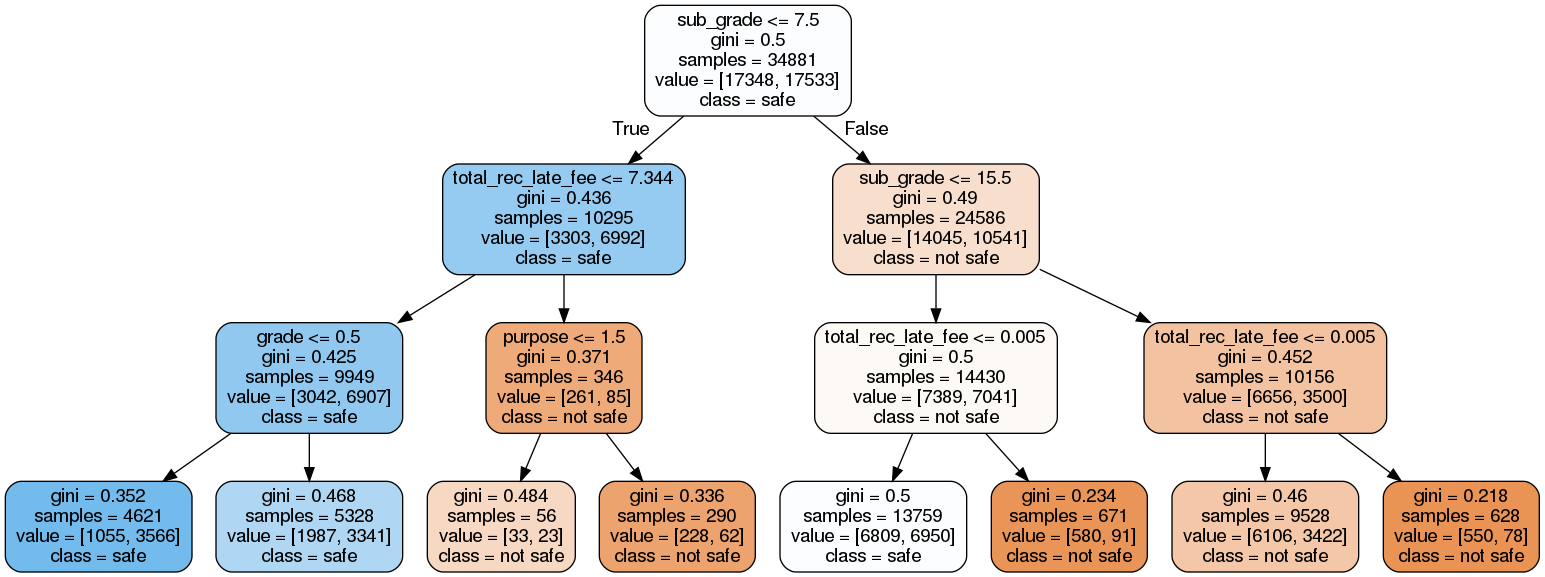

In [24]:
img = Image.open("safe-loans.png")
draw = ImageDraw.Draw(img)
img.save('output.png')
PImage("output.png")

### 7. test the module by using one data


In [25]:
# select the row indexted by 9
# : means all the data in that row. 

test_rec = X_test.iloc[9,:]


clf.predict([test_rec])


array([-1])

In [26]:
y_test.iloc[9]


-1

In [27]:
print('-'*100)

print('8. test the module by calculating the accuracy score')

----------------------------------------------------------------------------------------------------
8. test the module by calculating the accuracy score


In [28]:
# test the accuracy rate by the accuracy_score package.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, clf.predict(X_test))


0.6161520598606691